a) load air quality index dataset

In [1]:
!pip install ucimlrepo

In [25]:
from posixpath import pardir
from ucimlrepo import fetch_ucirepo
import pandas as pd

air_quality = fetch_ucirepo(id=360)
df = pd.DataFrame(data=air_quality.data.features)
df.head()

print(air_quality)

{'data': {'ids': None, 'features':            Date      Time  CO(GT)  PT08.S1(CO)  ...  PT08.S5(O3)     T    RH      AH
0     3/10/2004  18:00:00     2.6         1360  ...         1268  13.6  48.9  0.7578
1     3/10/2004  19:00:00     2.0         1292  ...          972  13.3  47.7  0.7255
2     3/10/2004  20:00:00     2.2         1402  ...         1074  11.9  54.0  0.7502
3     3/10/2004  21:00:00     2.2         1376  ...         1203  11.0  60.0  0.7867
4     3/10/2004  22:00:00     1.6         1272  ...         1110  11.2  59.6  0.7888
...         ...       ...     ...          ...  ...          ...   ...   ...     ...
9352   4/4/2005  10:00:00     3.1         1314  ...         1729  21.9  29.3  0.7568
9353   4/4/2005  11:00:00     2.4         1163  ...         1269  24.3  23.7  0.7119
9354   4/4/2005  12:00:00     2.4         1142  ...         1092  26.9  18.3  0.6406
9355   4/4/2005  13:00:00     2.1         1003  ...          770  28.3  13.5  0.5139
9356   4/4/2005  14:00:00     

b) plot the target data -> NO2(GT)

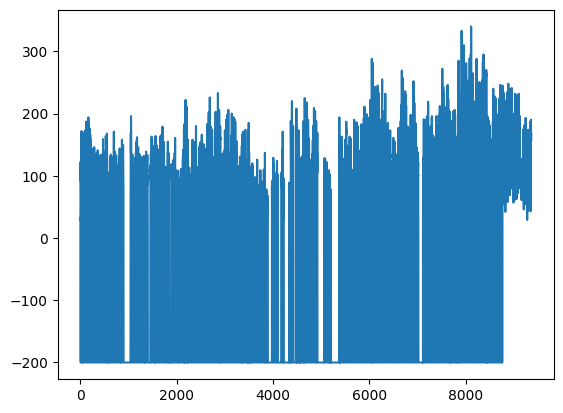

In [26]:
from matplotlib import pyplot as plt

plt.plot(df['NO2(GT)'])
plt.show()

c) adjust data

In [27]:
target_col = 'NO2(GT)'

df = df.dropna()

df = df.select_dtypes(include=[np.number])

x = df.drop(columns=[target_col])
y = df[target_col]

d) Use time series split (5 splits)

In [28]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

e) compare 3 regressions models (linear regression, random forest, naive)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive": GaussianNB()
}

for name, model in models.items():

    MAE = []
    MSE = []

    for train_index, test_index in tss.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        MAE.append(mean_absolute_error(y_test, y_pred))
        MSE.append(mean_squared_error(y_test, y_pred))

    # f) check mse and mae
    print(f'{name}')
    print(f"MAE: {np.mean(MAE):.4f}")
    print(f"MSE: {np.mean(MSE):.4f}")
    print()

Linear Regression
MAE: 53.1279
MSE: 6324.3170

Random Forest
MAE: 23.0068
MSE: 1979.0958

Naive
MAE: 32.2466
MSE: 3724.1688

